# **Laboratorio 8: Implementación algoritmo de Newton**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Paola Andrea Campiño
2.   Isabella Contreras
**Número del grupo**

*Grupo 5*

# **Método de Newton**
El método de Newton es una alternativa al algoritmo de descenso de gradiente al tener en cuenta la segunda derivada de la función que se desea optimizar. Considere la función $f: \mathbb{R}^n → \mathbb{R}$. Sea $x[k]\in\mathbb{R}^n$ el valor del candidato a solución en la iteración $k$. La regla de actualización en el método de Newton es:
\begin{align*}
  x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k]),
\end{align*}
donde $F^{-1}(x[k])$ es la inversa de la Hessiana evaluada en x[k].

\\

El algoritmo completo se podría plantear de la siguiente manera:
0. Definir $k=0$, un parámetro de convergengia $ϵ$ y un número máximo de iteraciones $N_{max}$
1. Seleccionar un punto inicial $x[0]$
2. Calcular $∇f( x[k])$ y $F^{-1}(x[k])$
3. Calcular $x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k])$
4. Si $||x[k+1]-x[k]||_2<ϵ$, parar. Si no, $k=k+1$ y volver al paso 2.


El objetivo de esta práctica es comparar el método de Newton con el algortimo de descenso de gradiente para minimizar una función de prueba dada con una condición de parada previamente definida. Para esto, considere la siguiente función:

\begin{align*}
 f(x) = (1-x_1)^2 + 5(x_2-x_1^2)^2,
\end{align*}

donde $x=[x_1,x_2]^T$. Con base en lo anterior, siga los siguientes pasos:





1. Encuentre el vector gradiente y la matriz Hessiana manualmente y escribalos a continuación.

**Responder aquí**

\begin{align*}
  {f(x)} = 1-2x_1+x_1^2 +5x_2^2-10x_1^2x_2+5x_1^4
  \end{align*}

**Calculo del Gradiente:**


\begin{align*}
  \frac {δf(x)}{δx_1} = -2+2x_1-20x_2x_1+20x_1^3
  \end{align*}
  \begin{align*}
  \frac {δf(x)}{δx_2} = 10x_2-10x_1^2
  \end{align*}

\begin{align*}
∇f( x)=[ -2+2x_1-20x_2x_1+20x_1^3 , 10x_2-10x_1^2]
  \end{align*}

**Calculo del Hessiana:**



\begin{align*}
  \frac {δ^2f(x)}{δx_1^2} = 2+60x_1^2-20x_2
  \end{align*}

  \begin{align*}
  \frac {δ^2f(x)}{δx_2^2} = 10
  \end{align*}

   \begin{align*}
  \frac {δ^2f(x)}{δx_1x_2} = -20x_1
  \end{align*}

  \begin{pmatrix}
2+60x_1^2-20x_2 & -20x_1 \\
-20x_1 &  10
\end{pmatrix}


**Calculo de $F^{-1}(x)$:**









2. Implemente el método de Newton teniendo en cuenta las condición de parada mencionada anteriormente con los siguientes parámetros:

 - $ϵ=0.1$
 - $x[0]=[0,0]^T$


In [ ]:
import numpy as np

def gradiente(X):
  return np.array([-2+(2*X[0])-(20*X[0]*X[1])+20*(X[0]**3),(10*X[1])-10*(X[0]**2)])
def hesiana(X):
  return np.array([[2+60*(X[0]**2)-20*X[1], -20*X[0]],
                    [-20*X[0],10]])

def inversa_hessiana(X):
  return np.linalg.inv(hesiana(X))



In [ ]:
def objective_function(X):
    return (1-X[0])**2 + 5*((X[1]-(X[0]**2))**2)

In [ ]:


def newton_method(e=0.001, x_0=[0,0]):
  x_array =[]
  error_ray =[]
  x_array.append(np.array(x_0))
  for i in range(0,9999):
    x_k = x_array[i]
    grad = gradiente(x_k)
    inv = inversa_hessiana(x_k)
    x_new = np.subtract(x_k, np.dot(grad, inv))
    x_array.append(x_new)
    error = np.array(x_array[i+1])-np.array(x_array[i])
    error_ray.append(np.linalg.norm(error))
    if ( np.linalg.norm(error)<e):
          return (x_array,error_ray,True)
  return (x_array,error_ray,False)






In [ ]:
newton_method()

([array([0, 0]), array([1., 0.]), array([1., 1.]), array([1., 1.])],
 [1.0, 1.0, 0.0],
 True)

3. Realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones



Text(0, 0.5, 'Valor normal de x[k+1] - x[k]')

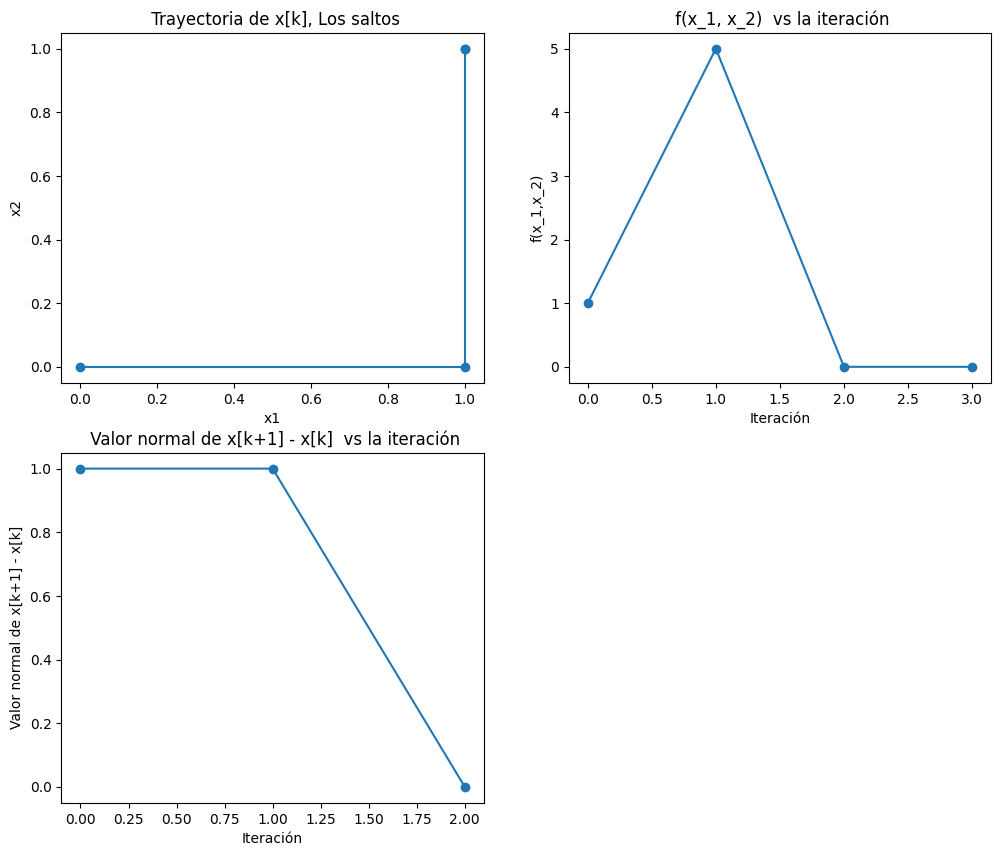

In [ ]:
import matplotlib.pyplot as plt

figure_7 = plt.figure(figsize=(12, 10))


x_1 = np.linspace(-3,3,900)
x_2 = np.linspace(-3,3,100)
ax_1 = figure_7.add_subplot(2, 2, 1)
ax_2 = figure_7.add_subplot(2, 2, 2)
ax_3 = figure_7.add_subplot(2, 2, 3)

p1=newton_method()
indices = np.arange(len(p1[1]))

(X_1,X_2) = np.meshgrid(x_1,x_2)
f= (1-X_1)**2 + 5*(X_2-X_1**2)**2


ax_1.set_title(" Trayectoria de x[k], Los saltos")
ax_1.set_xlabel('x1')
ax_1.set_ylabel('x2')
x_graf1=[]
y_graf1=[]
for i in p1[0]:
  x_graf1.append(i[0])
  y_graf1.append(i[1])
ax_1.plot(x_graf1,y_graf1,marker='o')



indices = np.arange(len(p1[1]))
f_val=[]
for i in p1[0]:

  f_val.append( objective_function(i))

indices2 = np.arange(len(f_val))

ax_2.plot(indices2,f_val,marker='o')
ax_2.set_title(" f(x_1, x_2)  vs la iteración")
ax_2.set_xlabel('Iteración')
ax_2.set_ylabel('f(x_1,x_2)')



ax_3.plot(indices,p1[1],marker='o')
ax_3.set_title(" Valor normal de x[k+1] - x[k]  vs la iteración")
ax_3.set_xlabel('Iteración')
ax_3.set_ylabel('Valor normal de x[k+1] - x[k]')



4. Ahora, use el algortimo de descenso de gradiente hecho en prácticas anteriores para encontrar el mínimo de la función. Use $α=0.01$.

In [ ]:
def grad_(X):
    return ([-2+2*X[0]-20*X[0]*X[1]+20*X[0]**3,10*X[1]-10*X[0]**2])

def alg_des_grad_err(x0=[0,0], a=0.01, n=350, e=0.0001):
    x_array =[]
    x_array.append(np.array(x0))
    error_ = []
    for i in range(0,n):
         x_k = x_array[i]
         grad = grad_(x_k)
         x_new = x_k - a * np.array(grad)
         x_array.append(x_new)
         error = np.array(x_array[i+1])-np.array(x_array[i])
         error_.append(np.linalg.norm(error))
         if ( np.linalg.norm(error)<e):
          return (x_array,error_,True)

    return (x_array,error_,False)

5. Para el algoritmo de descenso de gradiente implementado en el punto 4., realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones

Text(0, 0.5, 'Valor normal de x[k+1] - x[k]')

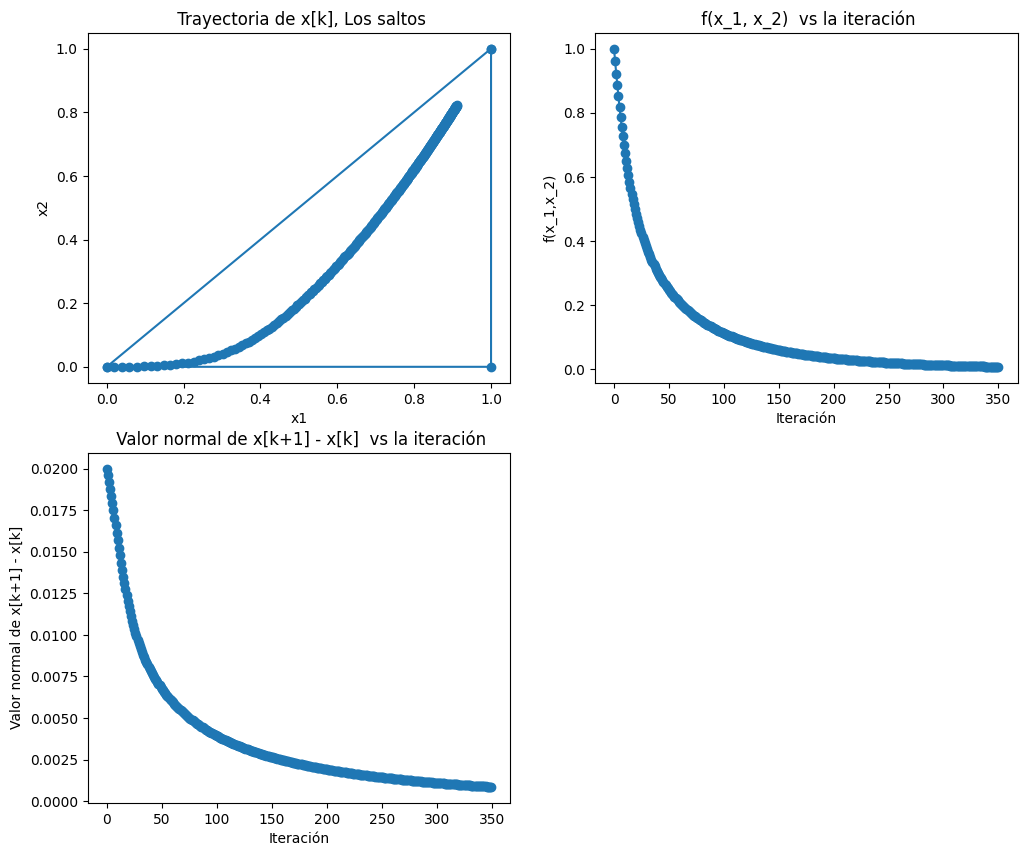

In [ ]:
import matplotlib.pyplot as plt

figure_7 = plt.figure(figsize=(12, 10))

p2= alg_des_grad_err()
x_1 = np.linspace(-3,3,50)
x_2 = np.linspace(-3,3,50)
ax_1 = figure_7.add_subplot(2, 2, 1)
ax_2 = figure_7.add_subplot(2, 2, 2)
ax_3 = figure_7.add_subplot(2, 2, 3)



(X_1,X_2) = np.meshgrid(x_1,x_2)
f= (1-X_1)**2 + 5*(X_2-X_1**2)**2


ax_1.set_title(" Trayectoria de x[k], Los saltos")
ax_1.set_xlabel('x1')
ax_1.set_ylabel('x2')
for i in p2[0]:
  x_graf1.append(i[0])
  y_graf1.append(i[1])
ax_1.plot(x_graf1,y_graf1,marker='o')



f_val=[]
for i in p2[0]:
  f_val.append( objective_function(i))

indices2 = np.arange(len(f_val))

ax_2.plot(indices2,f_val,marker='o')
ax_2.set_title(" f(x_1, x_2)  vs la iteración")
ax_2.set_xlabel('Iteración')
ax_2.set_ylabel('f(x_1,x_2)')


indices2 = np.arange(len(p2[1]))



ax_3.plot(indices2,p2[1],marker='o')
ax_3.set_title(" Valor normal de x[k+1] - x[k]  vs la iteración")
ax_3.set_xlabel('Iteración')
ax_3.set_ylabel('Valor normal de x[k+1] - x[k]')

6. Responda las siguientes preguntas:

- ¿Por qué cree que al algoritmo de descenso de gradiente le cuesta más converger que el método de Newton?


El método de newton al tener en cuenta la información relacionada a las derivadas de segundo orden permite saber de una manera más rapida el punto de convergencia que sería el punto más cercano a gradiente 0. Lo cual puede ser una gran ventaja especialmente cuando se está lidiando con secciones planas, así como puntos minimos locales, ya que el método de newton va intenter a ir a el maximo más optima. Lo otro es que este proceso se hace mucho más rapido para funciones de grado 2 y grado 1.

- Note el grado del polinómio de la función, ¿para qué grado polinómico el método de Newton converge en una sola iteración?

Para grado 1, ya que para l segunda derivada se va a encontrar muy rapidamente al al ser la segunda derivada igual a 0 , por lo que la formula final mente quedaría de la siguiente manera:

\begin{align*}
  x[k+1] = x[k] - 0∇f( x[k]),
\end{align*}
\begin{align*}
  =x[k+1] = x[k] ,
\end{align*}

Grado 2, también ya que para la segunda derivada se va a encontrar el valor de la constante, por lo que la formula final mente quedaría de la siguiente manera:

\begin{align*}
  x[k+1] = x[k] - α∇f( x[k]),
\end{align*}


Lo cual implica que $x[k+1]$ no cambia mucho ya que α no modifica mucho la función.


- ¿Cree que el punto inicial influye en la convergencia de ambos algortimos?

Si, pues si el punto inicial se encuentra más cercano al punto más optimo el punto a llegar será dicho punto. Sin embargo, en el caso en el que este se encuentre más lejano es muy posible que no solo tarden más, si no que tiendan a llegar a un posible punto minimo local.

- ¿Cómo podría mejorar la eficiencia del descenso de gradiente?

realizando procesos tales como verificación de convergencia, para que se tengan en cuenta los cambios de valor de la función objetivo; paralelización en donde se podria considerar diferentes pruntos de inicio para un mismo proceso corriendo, parelización con diferentes alphas para el método de descenso de gradiente.

